In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Causal Inference
* CausalNex: https://github.com/mckinsey/causalnex
    * structure - Directed acyclic graph structure learning: https://causalnex.readthedocs.io/en/latest/03_tutorial/01_first_tutorial.html
    * network - Bayesian network modeling: https://causalnex.readthedocs.io/en/latest/03_tutorial/01_first_tutorial.html#Fitting-the-Conditional-Distribution-of-the-Bayesian-Network
    * evaluation - Model evaluation: https://causalnex.readthedocs.io/en/latest/03_tutorial/01_first_tutorial.html#Model-Probability
    * inference - Model inference: https://causalnex.readthedocs.io/en/latest/03_tutorial/01_first_tutorial.html#Querying-Marginals
* DoWhy: https://github.com/py-why/dowhy
    * gcm - Graphical causal model-based inference: https://www.pywhy.org/dowhy/v0.9.1/user_guide/gcm_based_inference/index.html
* ananke - Causal inference with DAGs: https://ananke.readthedocs.io/en/latest/

In [14]:
full_train = pd.read_csv('/Users/vivianyan/Desktop/NYU_Capstone_Project/Data/train_final.csv')
sub = pd.read_csv('/Users/vivianyan/Desktop/NYU_Capstone_Project/Data/sub_train.csv')
segment = sub[['Capstone_id', 'segment']]
full_train = full_train.merge(segment, on='Capstone_id', how='left')
full_train.columns

Index(['Capstone_id', 'Network', 'RECENCY_view', 'FREQUENCY_view',
       'TENURE_view', 'TOTAL_WATCH_view_1m', 'TOTAL_WATCH_view_3m',
       'TOTAL_WATCH_view_6m', 'PCT_DIFF_WATCH_1_2_view',
       'PCT_DIFF_WATCH_2_3_view', 'Recency_subs', 'Frequency_subs',
       'Revenue_subs', 'multi_sub', 'churned', 'LTV_cluster', 'RECENCY_online',
       'TENURE_online', 'FREQUENCY_online_1m', 'FREQUENCY_online_3m',
       'FREQUENCY_online_6m', 'PCT_DIFF_1_2_online', 'PCT_DIFF_2_3_online',
       'segment'],
      dtype='object')

In [15]:
full_train = pd.get_dummies(
    data=full_train, 
    columns=['Network'], 
    dtype=int
    )
full_train.head()

,Capstone_id,RECENCY_view,FREQUENCY_view,TENURE_view,TOTAL_WATCH_view_1m,TOTAL_WATCH_view_3m,TOTAL_WATCH_view_6m,PCT_DIFF_WATCH_1_2_view,PCT_DIFF_WATCH_2_3_view,Recency_subs,...,FREQUENCY_online_3m,FREQUENCY_online_6m,PCT_DIFF_1_2_online,PCT_DIFF_2_3_online,segment,Network_CHILLSTREAM,Network_CINEQUEST,Network_LIMELIGHT,Network_PULSE,Network_RETROREEL
0,AAA6935373,29,1,1,65.0,65.0,65.0,0.000000,65000.0,39,...,1,1,-100.0,900.0,1,0,0,0,0,1
1,AAA9527798,4,1,1,86.0,86.0,86.0,0.000000,86000.0,24,...,0,1,-100.0,-100.0,1,0,0,0,1,0
2,AAC1231805,150,1,1,0.0,0.0,60.0,-100.000000,0.0,64,...,1,1,-100.0,900.0,2,0,0,1,0,0
3,AAJ6284597,164,2,5,0.0,0.0,175.0,-100.000000,0.0,46,...,1,1,-100.0,900.0,1,0,0,0,1,0
4,AAN4840267,72,2,99,0.0,25.0,116.0,-72.527473,-100.0,32,...,0,1,900.0,-100.0,1,0,0,0,1,0


## Feature distributions among (non)churned users
Compare the distribution of different numeric features between churned (Class = 1) and non-churned (Class = 0) customers. 

**Goal**: visually identify which features might be predictive of churn.
* Blue: Class 0 (non-churned users)
* Orange: Class 1 (churned users)

/var/folders/sv/tqkwxbbd1l96g8tr45l86pmw0000gn/T/ipykernel_34234/968810927.py:14: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
/var/folders/sv/tqkwxbbd1l96g8tr45l86pmw0000gn/T/ipykernel_34234/968810927.py:15: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
/var/folders/sv/tqkwxbbd1l96g8tr45l86pmw0000gn/T/ipykernel_34234/968810927.py:14: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This 

<Figure size 640x480 with 0 Axes>

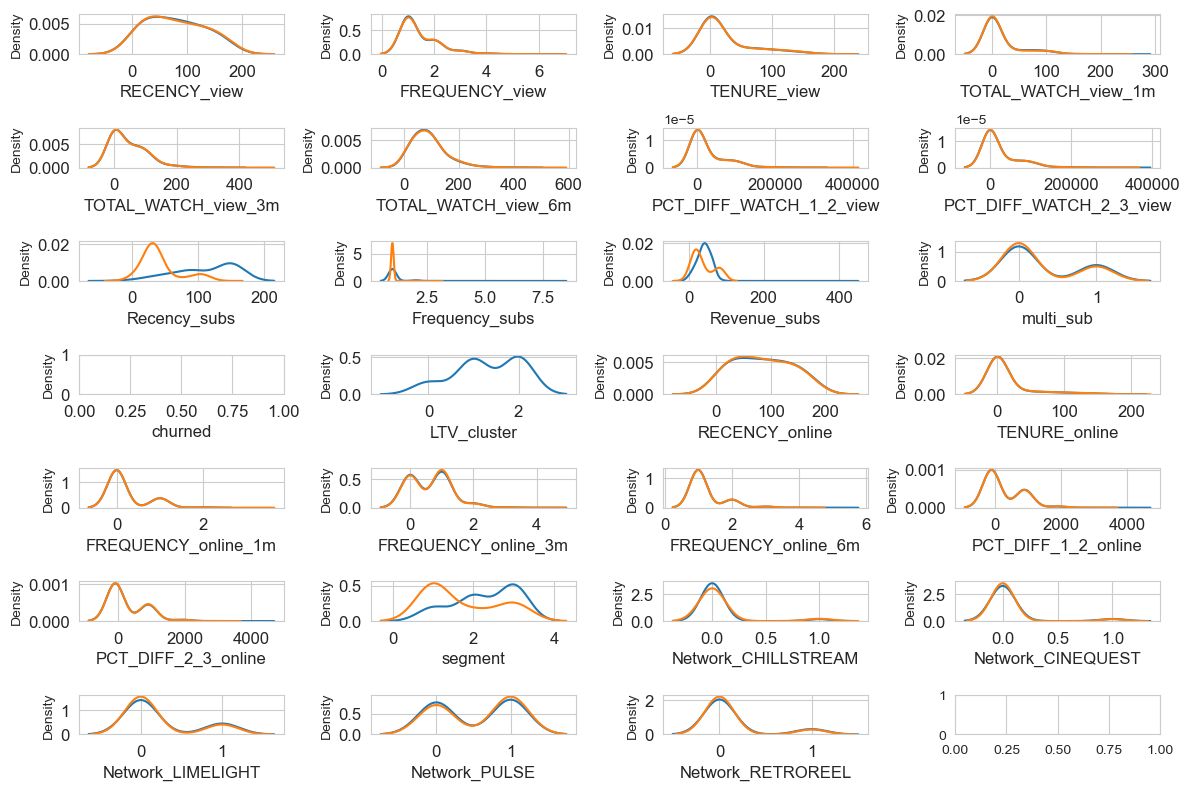

In [12]:
var = full_train.select_dtypes(include=['float64', 'int']).columns.tolist()

i = 0
t0 = full_train.loc[full_train['churned'] == 0]
t1 = full_train.loc[full_train['churned'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(7,4,figsize=(12,8))

for feature in var:
    i += 1
    plt.subplot(7,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout()
plt.show();

If the two distributions are very different for a given feature (i.e., little overlap), then that feature may be useful in predicting churn.

**Conclusion**: 
Sub RFM affect whether the customer will churn or not the most.
* Segment (which depends on RFM from sub): **low-value** customers are more likely to churn.

## Correlation plot

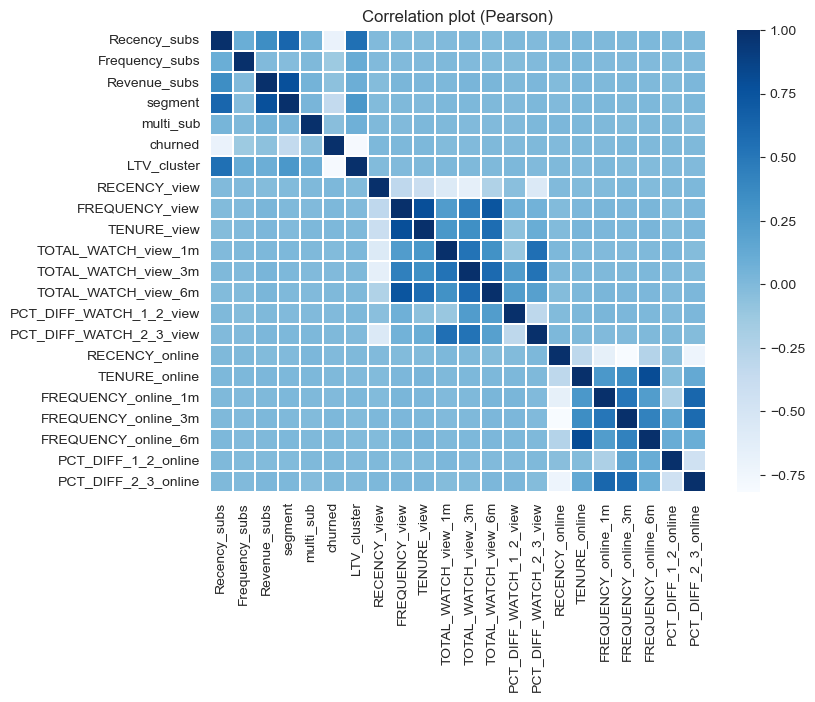

In [16]:
numericals = ['Recency_subs', 'Frequency_subs', 'Revenue_subs', 'segment', 
              'multi_sub', 'churned', 'LTV_cluster',
              'RECENCY_view', 'FREQUENCY_view', 'TENURE_view', 
              'TOTAL_WATCH_view_1m', 'TOTAL_WATCH_view_3m', 'TOTAL_WATCH_view_6m', 'PCT_DIFF_WATCH_1_2_view', 'PCT_DIFF_WATCH_2_3_view',  
              'RECENCY_online', 'TENURE_online', 
              'FREQUENCY_online_1m', 'FREQUENCY_online_3m', 'FREQUENCY_online_6m', 'PCT_DIFF_1_2_online', 'PCT_DIFF_2_3_online'
              ]

plt.figure(figsize = (8,6))
plt.title('Correlation plot (Pearson)')
corr = full_train[numericals].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,linewidths=.1,cmap="Blues")
plt.show();

In [17]:
def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify").format(precision=2)\
    .set_table_styles(magnify())

,Recency_subs,Frequency_subs,Revenue_subs,segment,multi_sub,churned,LTV_cluster,RECENCY_view,FREQUENCY_view,TENURE_view,TOTAL_WATCH_view_1m,TOTAL_WATCH_view_3m,TOTAL_WATCH_view_6m,PCT_DIFF_WATCH_1_2_view,PCT_DIFF_WATCH_2_3_view,RECENCY_online,TENURE_online,FREQUENCY_online_1m,FREQUENCY_online_3m,FREQUENCY_online_6m,PCT_DIFF_1_2_online,PCT_DIFF_2_3_online
Recency_subs,1.00,0.09,0.34,0.62,0.04,-0.70,0.55,-0.00,-0.02,-0.02,-0.00,0.00,-0.01,0.00,-0.00,0.00,0.01,0.00,0.00,0.01,0.00,-0.00
Frequency_subs,0.09,1.00,-0.01,-0.02,0.00,-0.13,0.11,-0.00,-0.01,-0.00,0.00,-0.00,-0.01,-0.02,-0.00,0.01,0.01,-0.00,-0.00,-0.00,-0.01,-0.01
Revenue_subs,0.34,-0.01,1.00,0.77,0.05,-0.06,0.09,-0.02,0.02,0.02,0.01,0.03,0.02,-0.00,0.01,-0.01,0.02,0.01,0.01,0.00,-0.01,0.02
segment,0.62,-0.02,0.77,1.00,0.03,-0.34,0.27,-0.01,0.00,-0.01,0.01,0.01,0.00,-0.00,0.01,-0.00,0.01,0.01,0.01,0.01,-0.01,0.01
multi_sub,0.04,0.00,0.05,0.03,1.00,-0.04,0.07,0.00,-0.00,0.01,0.00,-0.01,-0.01,-0.00,0.01,0.01,0.01,0.00,-0.01,0.00,0.00,-0.02
churned,-0.70,-0.13,-0.06,-0.34,-0.04,1.00,-0.79,0.01,0.01,0.01,-0.01,-0.00,0.00,-0.00,0.00,-0.01,0.00,-0.00,0.01,0.00,0.00,-0.00
LTV_cluster,0.55,0.11,0.09,0.27,0.07,-0.79,1.00,-0.01,-0.00,0.00,0.01,-0.00,0.00,0.01,-0.00,0.01,-0.01,0.01,-0.01,-0.01,-0.01,-0.00
RECENCY_view,-0.00,-0.00,-0.02,-0.01,0.00,0.01,-0.01,1.00,-0.32,-0.40,-0.57,-0.65,-0.24,-0.05,-0.56,-0.01,-0.01,-0.01,0.01,-0.01,0.00,0.01
FREQUENCY_view,-0.02,-0.01,0.02,0.00,-0.00,0.01,-0.00,-0.32,1.00,0.78,0.24,0.44,0.74,0.08,0.06,-0.01,0.02,0.02,0.01,0.02,-0.01,0.01
TENURE_view,-0.02,-0.00,0.02,-0.01,0.01,0.01,0.00,-0.40,0.78,1.00,0.27,0.33,0.57,-0.06,0.10,-0.01,0.03,0.01,0.01,0.03,-0.01,0.02


**Conclusion:**
Viewership and online content don't add much information regarding churn analysis.

# Causal discovery & visualization

## Load and preprocess data

In [34]:
full_train = pd.read_csv('/Users/vivianyan/Desktop/NYU_Capstone_Project/Data/train_final.csv')
sub = pd.read_csv('/Users/vivianyan/Desktop/NYU_Capstone_Project/Data/sub_train.csv')
segment = sub[['Capstone_id', 'segment']]
full_train = full_train.merge(segment, on='Capstone_id', how='left')
demo = pd.read_csv('/Users/vivianyan/Desktop/NYU_Capstone_Project/Data/demo_data.csv')

df = full_train.merge(demo, on='Capstone_id', how='left')
df['Gender'] = df['Gender'].replace({
    'Male': 0, 'Female':1, 'Other':2})
df.head()

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


,Capstone_id,Network,RECENCY_view,FREQUENCY_view,TENURE_view,TOTAL_WATCH_view_1m,TOTAL_WATCH_view_3m,TOTAL_WATCH_view_6m,PCT_DIFF_WATCH_1_2_view,PCT_DIFF_WATCH_2_3_view,...,FREQUENCY_online_3m,FREQUENCY_online_6m,PCT_DIFF_1_2_online,PCT_DIFF_2_3_online,segment,Age,Gender,Location,Email,Income
0,AAA6935373,RETROREEL,29,1,1,65.0,65.0,65.0,0.000000,65000.0,...,1,1,-100.0,900.0,1,59,0,East Patriciaberg,amymorrow@example.net,63614
1,AAA9527798,PULSE,4,1,1,86.0,86.0,86.0,0.000000,86000.0,...,0,1,-100.0,-100.0,1,80,1,Rickeyfurt,vasquezjennifer@example.com,82891
2,AAC1231805,LIMELIGHT,150,1,1,0.0,0.0,60.0,-100.000000,0.0,...,1,1,-100.0,900.0,2,72,0,Ricardoborough,davidle@example.net,61444
3,AAJ6284597,PULSE,164,2,5,0.0,0.0,175.0,-100.000000,0.0,...,1,1,-100.0,900.0,1,46,1,Judithport,pearsonmelissa@example.com,56898
4,AAN4840267,PULSE,72,2,99,0.0,25.0,116.0,-72.527473,-100.0,...,0,1,900.0,-100.0,1,70,0,New Rachel,markbrown@example.org,73911


Data feature breakdown:
* sub: RFM, segment, multi_sub, churned, LTV
* viewership: RF, tenure, total_watch, pct_diff_watch
* online: RF, tenure, pct_diff
* demo: age, income, gender

In [35]:
df.columns

Index(['Capstone_id', 'Network', 'RECENCY_view', 'FREQUENCY_view',
       'TENURE_view', 'TOTAL_WATCH_view_1m', 'TOTAL_WATCH_view_3m',
       'TOTAL_WATCH_view_6m', 'PCT_DIFF_WATCH_1_2_view',
       'PCT_DIFF_WATCH_2_3_view', 'Recency_subs', 'Frequency_subs',
       'Revenue_subs', 'multi_sub', 'churned', 'LTV_cluster', 'RECENCY_online',
       'TENURE_online', 'FREQUENCY_online_1m', 'FREQUENCY_online_3m',
       'FREQUENCY_online_6m', 'PCT_DIFF_1_2_online', 'PCT_DIFF_2_3_online',
       'segment', 'Age', 'Gender', 'Location', 'Email', 'Income'],
      dtype='object')

## Use causal inference model
* Option A: Using CausalML (Meta-learners: e.g., T-Learner, X-Learner)
* Option B: Using DoWhy (Structural Causal Models)
* Option C: Using EconML (Double Machine Learning)
### CausalML
#### Multi-sub on churn

In [36]:
from sklearn.preprocessing import StandardScaler
import numpy as np

numerical_features = ['Recency_subs', 'Frequency_subs', 'Revenue_subs', 
              'RECENCY_view', 'FREQUENCY_view', 'TENURE_view', 
              'TOTAL_WATCH_view_1m', 'TOTAL_WATCH_view_3m', 'TOTAL_WATCH_view_6m', 'PCT_DIFF_WATCH_1_2_view', 'PCT_DIFF_WATCH_2_3_view',  
              'RECENCY_online', 'TENURE_online', 
              'FREQUENCY_online_1m', 'FREQUENCY_online_3m', 'FREQUENCY_online_6m', 'PCT_DIFF_1_2_online', 'PCT_DIFF_2_3_online',
              'Age', 'Income'
              ]
categorical_features = ['segment', 'Gender']
scaler = StandardScaler()
X_scaled_num = scaler.fit_transform(df[numerical_features])
X_final = np.hstack((X_scaled_num, df[categorical_features].values))
X = pd.DataFrame(X_final, columns=numerical_features + categorical_features)

T = df['multi_sub']
print("Treatment distribution (Multi-sub):")
print(T.value_counts())

Y = df['churned']
print("\nChurn distribution:")
print(Y.value_counts())

Treatment distribution (Multi-sub):
multi_sub
0    8876
1    3719
Name: count, dtype: int64

Churn distribution:
churned
1    6403
0    6192
Name: count, dtype: int64


**Note:**
* The model is trying to fit a logistic/linear regression and couldn’t converge to a solution within the default number of iterations (100 by default), probably because:
    * Highly collinear features (e.g., monetary_1 and monetary_2 being correlated),
    * Large feature values (e.g., income in the tens of thousands),
    * Poor feature scaling, especially if you’re mixing values like Age and Income.
    
**Solution:**
* Standardize features
* Set a higher `max_iter` if using LogisticRegression
* Swithc to a tree-based model: XGBoost or RandomForest

In [37]:
from causalml.inference.meta import BaseSClassifier
from xgboost import XGBClassifier

# Train causal inference model (X-Learner)
s_learner = BaseSClassifier(learner=XGBClassifier(eval_metric='logloss'))
s_learner.fit(X=X, treatment=T, y=Y)

# Estimate individual treatment effects (ITEs)
te = s_learner.predict(X)
df['estimated_treatment_effect'] = te
df.head()

,Capstone_id,Network,RECENCY_view,FREQUENCY_view,TENURE_view,TOTAL_WATCH_view_1m,TOTAL_WATCH_view_3m,TOTAL_WATCH_view_6m,PCT_DIFF_WATCH_1_2_view,PCT_DIFF_WATCH_2_3_view,...,FREQUENCY_online_6m,PCT_DIFF_1_2_online,PCT_DIFF_2_3_online,segment,Age,Gender,Location,Email,Income,estimated_treatment_effect
0,AAA6935373,RETROREEL,29,1,1,65.0,65.0,65.0,0.000000,65000.0,...,1,-100.0,900.0,1,59,0,East Patriciaberg,amymorrow@example.net,63614,0.002823
1,AAA9527798,PULSE,4,1,1,86.0,86.0,86.0,0.000000,86000.0,...,1,-100.0,-100.0,1,80,1,Rickeyfurt,vasquezjennifer@example.com,82891,0.006902
2,AAC1231805,LIMELIGHT,150,1,1,0.0,0.0,60.0,-100.000000,0.0,...,1,-100.0,900.0,2,72,0,Ricardoborough,davidle@example.net,61444,-0.054703
3,AAJ6284597,PULSE,164,2,5,0.0,0.0,175.0,-100.000000,0.0,...,1,-100.0,900.0,1,46,1,Judithport,pearsonmelissa@example.com,56898,-0.000491
4,AAN4840267,PULSE,72,2,99,0.0,25.0,116.0,-72.527473,-100.0,...,1,900.0,-100.0,1,70,0,New Rachel,markbrown@example.org,73911,-0.005134


     Capstone_id  estimated_treatment_effect  churned
3840  IEA0663170                    0.260192        0
5454  LPV4913708                    0.231930        0
7760  QIG8826674                    0.213480        0
9131  TDU0179339                    0.181757        0
5754  MGY8458596                    0.126050        0
9847  UOY1142261                    0.125125        0
7754  QIE5257801                    0.117312        0
8537  RYN7935876                    0.114976        1
8538  RYN7935876                    0.114976        1
1606  DLV3893899                    0.109277        0


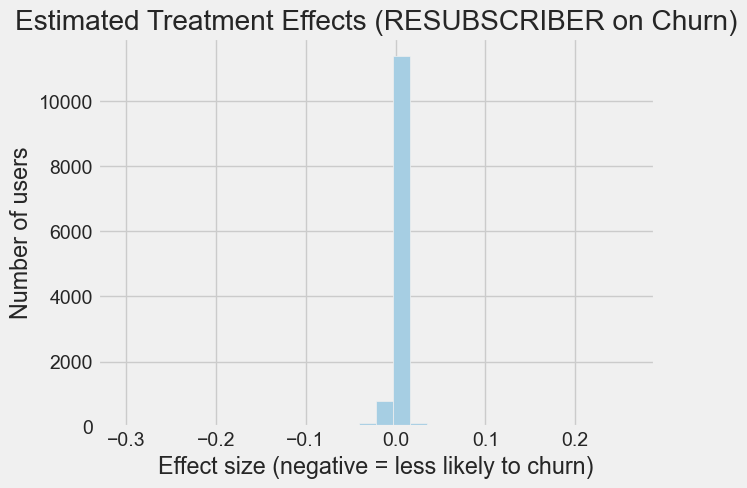

In [38]:
# Top customers most likely to benefit from RESUBSCRIBER treatment
top_positive = df.sort_values('estimated_treatment_effect', ascending=False).head(10)
print(top_positive[['Capstone_id', 'estimated_treatment_effect', 'churned']])

# Histogram of treatment effects
plt.hist(df['estimated_treatment_effect'], bins=30)
plt.title("Estimated Treatment Effects (RESUBSCRIBER on Churn)")
plt.xlabel("Effect size (negative = less likely to churn)")
plt.ylabel("Number of users")
plt.show()

**Note:**
This histogram is showing the estimated individual treatment effects (ITEs) of being a RESUBSCRIBER on churn — specifically, how much each user’s likelihood of churning is impacted causally by being a resubscriber.
* X-axis = Treatment effect size
    * Negative values → treatment (being a RESUBSCRIBER) reduced the likelihood of churn
    * Positive values → treatment increased churn risk
    * 0 → no estimated effect
* Y-axis = Number of users in that effect range

**Conclusion:**
The treatment (multi-sub) has little to no causal effect on churn. Maybe being a multi-subscriber doesn’t actually influence whether people churn — it could be more of a symptom than a cause.

In [39]:
print('Segment Analysis')
print(df.groupby('segment')['estimated_treatment_effect'].mean())

print('\nLTV Analysis')
print(df.groupby('LTV_cluster')['estimated_treatment_effect'].mean())

Segment Analysis
segment
1   -0.002356
2   -0.001045
3    0.000170
Name: estimated_treatment_effect, dtype: float64

LTV Analysis
LTV_cluster
0   -0.001354
1   -0.000473
2   -0.000948
Name: estimated_treatment_effect, dtype: float64


### EconML
#### Gender on churn
Move into multi-valued treatment causal inference, while this is not directly supported by classic binary T/C causal learners (like S-learner, T-learner, or X-learner). Alternatively:
* Use EconML’s DRLearner or CausalForestDML with Categorical Treatment (Experimental)

In [41]:
numerical_features = ['Recency_subs', 'Frequency_subs', 'Revenue_subs', 
              'RECENCY_view', 'FREQUENCY_view', 'TENURE_view', 
              'TOTAL_WATCH_view_1m', 'TOTAL_WATCH_view_3m', 'TOTAL_WATCH_view_6m', 'PCT_DIFF_WATCH_1_2_view', 'PCT_DIFF_WATCH_2_3_view',  
              'RECENCY_online', 'TENURE_online', 
              'FREQUENCY_online_1m', 'FREQUENCY_online_3m', 'FREQUENCY_online_6m', 'PCT_DIFF_1_2_online', 'PCT_DIFF_2_3_online',
              'Age', 'Income'
              ]
categorical_features = ['multi_sub', 'segment']
scaler = StandardScaler()
X_scaled_num = scaler.fit_transform(df[numerical_features])
X_final = np.hstack((X_scaled_num, df[categorical_features].values))
X = pd.DataFrame(X_final, columns=numerical_features + categorical_features)

T = df['Gender']
print("Treatment distribution (Gender):")
print(T.value_counts())

Y = df['churned']
print("\nChurn distribution:")
print(Y.value_counts())

Treatment distribution (Gender):
Gender
0    6247
1    5723
2     625
Name: count, dtype: int64

Churn distribution:
churned
1    6403
0    6192
Name: count, dtype: int64


In [42]:
from econml.dr import DRLearner
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

model = DRLearner(
    model_regression=RandomForestRegressor(),
    model_propensity=RandomForestClassifier(),
    model_final=RandomForestRegressor()
)
model.fit(Y, T, X=X)

# Get effect of low-value vs segment high-value
df['male_vs_female_effect'] = model.effect(X, T0=0, T1=1)
df['male_vs_others_effect'] = model.effect(X, T0=0, T1=2)
df['female_vs_others_effect'] = model.effect(X, T0=1, T1=2)
df.head()

,Capstone_id,Network,RECENCY_view,FREQUENCY_view,TENURE_view,TOTAL_WATCH_view_1m,TOTAL_WATCH_view_3m,TOTAL_WATCH_view_6m,PCT_DIFF_WATCH_1_2_view,PCT_DIFF_WATCH_2_3_view,...,segment,Age,Gender,Location,Email,Income,estimated_treatment_effect,male_vs_female_effect,male_vs_others_effect,female_vs_others_effect
0,AAA6935373,RETROREEL,29,1,1,65.0,65.0,65.0,0.000000,65000.0,...,1,59,0,East Patriciaberg,amymorrow@example.net,63614,0.002823,-0.196825,-0.165128,0.031697
1,AAA9527798,PULSE,4,1,1,86.0,86.0,86.0,0.000000,86000.0,...,1,80,1,Rickeyfurt,vasquezjennifer@example.com,82891,0.006902,0.386653,-0.379175,-0.765828
2,AAC1231805,LIMELIGHT,150,1,1,0.0,0.0,60.0,-100.000000,0.0,...,2,72,0,Ricardoborough,davidle@example.net,61444,-0.054703,0.495299,0.511973,0.016674
3,AAJ6284597,PULSE,164,2,5,0.0,0.0,175.0,-100.000000,0.0,...,1,46,1,Judithport,pearsonmelissa@example.com,56898,-0.000491,1.001158,0.028123,-0.973035
4,AAN4840267,PULSE,72,2,99,0.0,25.0,116.0,-72.527473,-100.0,...,1,70,0,New Rachel,markbrown@example.org,73911,-0.005134,1.629892,1.713987,0.084096


     Capstone_id  estimated_treatment_effect  churned
3840  IEA0663170                    0.260192        0
5454  LPV4913708                    0.231930        0
7760  QIG8826674                    0.213480        0
9131  TDU0179339                    0.181757        0
5754  MGY8458596                    0.126050        0
9847  UOY1142261                    0.125125        0
7754  QIE5257801                    0.117312        0
8537  RYN7935876                    0.114976        1
8538  RYN7935876                    0.114976        1
1606  DLV3893899                    0.109277        0


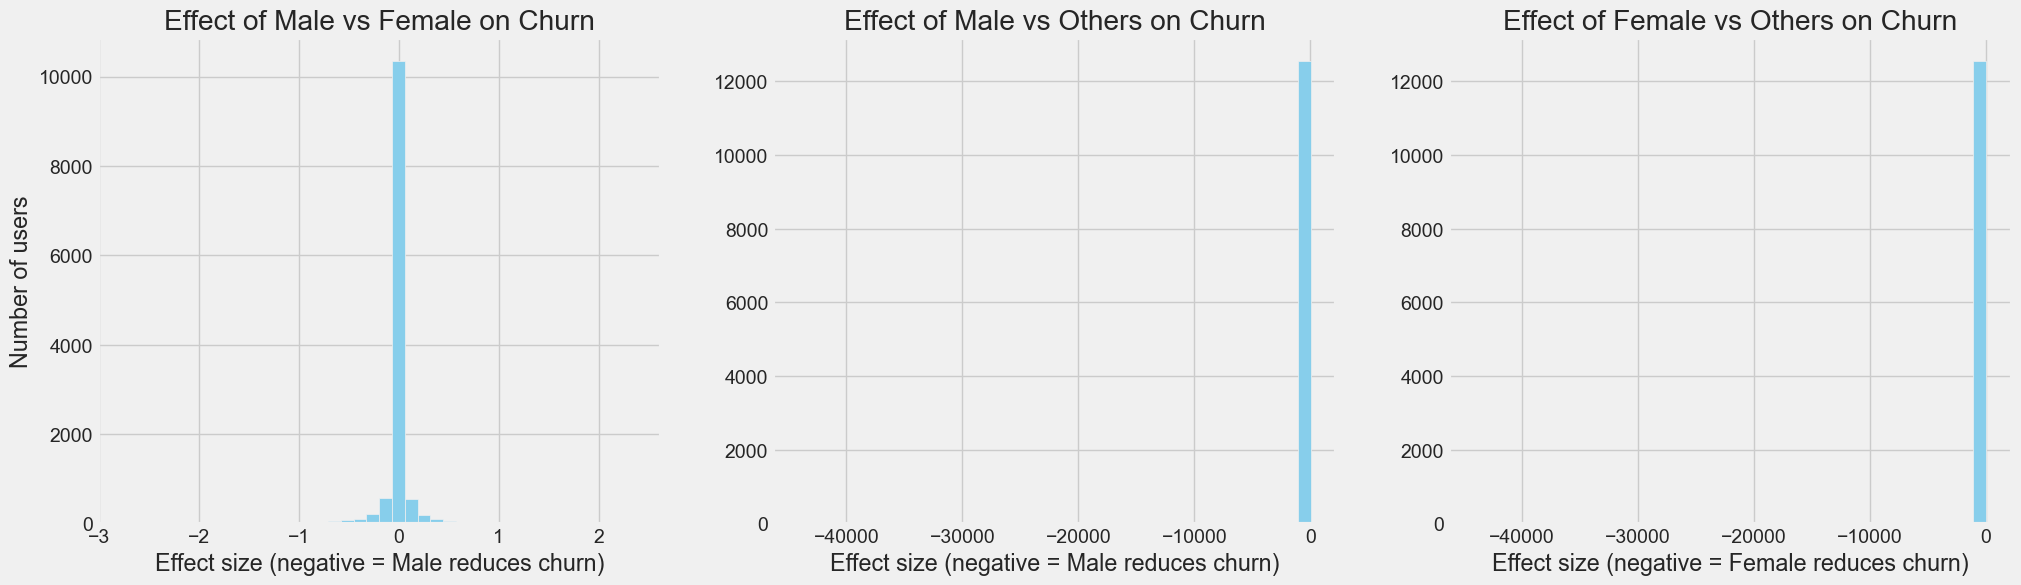

In [43]:
top_positive = df.sort_values('estimated_treatment_effect', ascending=False).head(10)
print(top_positive[['Capstone_id', 'estimated_treatment_effect', 'churned']])

plt.figure(figsize=(22,6))
plt.subplot(1,3,1)
plt.hist(df['male_vs_female_effect'], bins=40, color='skyblue')
plt.title("Effect of Male vs Female on Churn")
plt.xlabel("Effect size (negative = Male reduces churn)")
plt.ylabel("Number of users")

plt.subplot(1,3,2)
plt.hist(df['male_vs_others_effect'], bins=40, color='skyblue')
plt.title("Effect of Male vs Others on Churn")
plt.xlabel("Effect size (negative = Male reduces churn)")
plt.ylabel("")

plt.subplot(1,3,3)
plt.hist(df['female_vs_others_effect'], bins=40, color='skyblue')
plt.title("Effect of Female vs Others on Churn")
plt.xlabel("Effect size (negative = Female reduces churn)")
plt.ylabel("")
plt.show()

In [44]:
from scipy.stats import skew

print("Skew of Male vs Others:", skew(df['male_vs_others_effect'])) # pos->right tail, high-value reduces churn
print("Skew of Female vs Others:", skew(df['female_vs_others_effect']))

Skew of Male vs Others: -54.053127003361936
Skew of Female vs Others: -54.05315428952708


**Conclusion:** Male and female will significantly affect churn compared to other gender. But no big difference between male and female segments on churn.

#### Segment on churn

In [45]:
numerical_features = ['Recency_subs', 'Frequency_subs', 'Revenue_subs', 
              'RECENCY_view', 'FREQUENCY_view', 'TENURE_view', 
              'TOTAL_WATCH_view_1m', 'TOTAL_WATCH_view_3m', 'TOTAL_WATCH_view_6m', 'PCT_DIFF_WATCH_1_2_view', 'PCT_DIFF_WATCH_2_3_view',  
              'RECENCY_online', 'TENURE_online', 
              'FREQUENCY_online_1m', 'FREQUENCY_online_3m', 'FREQUENCY_online_6m', 'PCT_DIFF_1_2_online', 'PCT_DIFF_2_3_online',
              'Age', 'Income'
              ]
categorical_features = ['multi_sub', 'Gender']
scaler = StandardScaler()
X_scaled_num = scaler.fit_transform(df[numerical_features])
X_final = np.hstack((X_scaled_num, df[categorical_features].values))
X = pd.DataFrame(X_final, columns=numerical_features + categorical_features)

T = df['segment']
print("Treatment distribution (Segment):")
print(T.value_counts())

Y = df['churned']
print("\nChurn distribution:")
print(Y.value_counts())

Treatment distribution (Segment):
segment
1    4805
3    4755
2    3035
Name: count, dtype: int64

Churn distribution:
churned
1    6403
0    6192
Name: count, dtype: int64


In [46]:
from econml.dr import DRLearner
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

model = DRLearner(
    model_regression=RandomForestRegressor(),
    model_propensity=RandomForestClassifier(),
    model_final=RandomForestRegressor()
)
model.fit(Y, T, X=X)

# Get effect of low-value vs segment high-value
te_seg1_vs_seg3 = model.effect(X, T0=1, T1=3)
df['low_vs_mid_effect'] = model.effect(X, T0=1, T1=2)
df['low_vs_high_effect'] = model.effect(X, T0=1, T1=3)
df['mid_vs_high_effect'] = model.effect(X, T0=2, T1=3)
df.head()

,Capstone_id,Network,RECENCY_view,FREQUENCY_view,TENURE_view,TOTAL_WATCH_view_1m,TOTAL_WATCH_view_3m,TOTAL_WATCH_view_6m,PCT_DIFF_WATCH_1_2_view,PCT_DIFF_WATCH_2_3_view,...,Location,Email,Income,estimated_treatment_effect,male_vs_female_effect,male_vs_others_effect,female_vs_others_effect,low_vs_mid_effect,low_vs_high_effect,mid_vs_high_effect
0,AAA6935373,RETROREEL,29,1,1,65.0,65.0,65.0,0.000000,65000.0,...,East Patriciaberg,amymorrow@example.net,63614,0.002823,-0.196825,-0.165128,0.031697,-0.228155,-0.196342,0.031813
1,AAA9527798,PULSE,4,1,1,86.0,86.0,86.0,0.000000,86000.0,...,Rickeyfurt,vasquezjennifer@example.com,82891,0.006902,0.386653,-0.379175,-0.765828,-0.194707,-0.213596,-0.018888
2,AAC1231805,LIMELIGHT,150,1,1,0.0,0.0,60.0,-100.000000,0.0,...,Ricardoborough,davidle@example.net,61444,-0.054703,0.495299,0.511973,0.016674,-0.180208,-0.073012,0.107196
3,AAJ6284597,PULSE,164,2,5,0.0,0.0,175.0,-100.000000,0.0,...,Judithport,pearsonmelissa@example.com,56898,-0.000491,1.001158,0.028123,-0.973035,-0.032234,-0.021176,0.011058
4,AAN4840267,PULSE,72,2,99,0.0,25.0,116.0,-72.527473,-100.0,...,New Rachel,markbrown@example.org,73911,-0.005134,1.629892,1.713987,0.084096,0.837801,0.701225,-0.136576


     Capstone_id  estimated_treatment_effect  churned
3840  IEA0663170                    0.260192        0
5454  LPV4913708                    0.231930        0
7760  QIG8826674                    0.213480        0
9131  TDU0179339                    0.181757        0
5754  MGY8458596                    0.126050        0
9847  UOY1142261                    0.125125        0
7754  QIE5257801                    0.117312        0
8537  RYN7935876                    0.114976        1
8538  RYN7935876                    0.114976        1
1606  DLV3893899                    0.109277        0


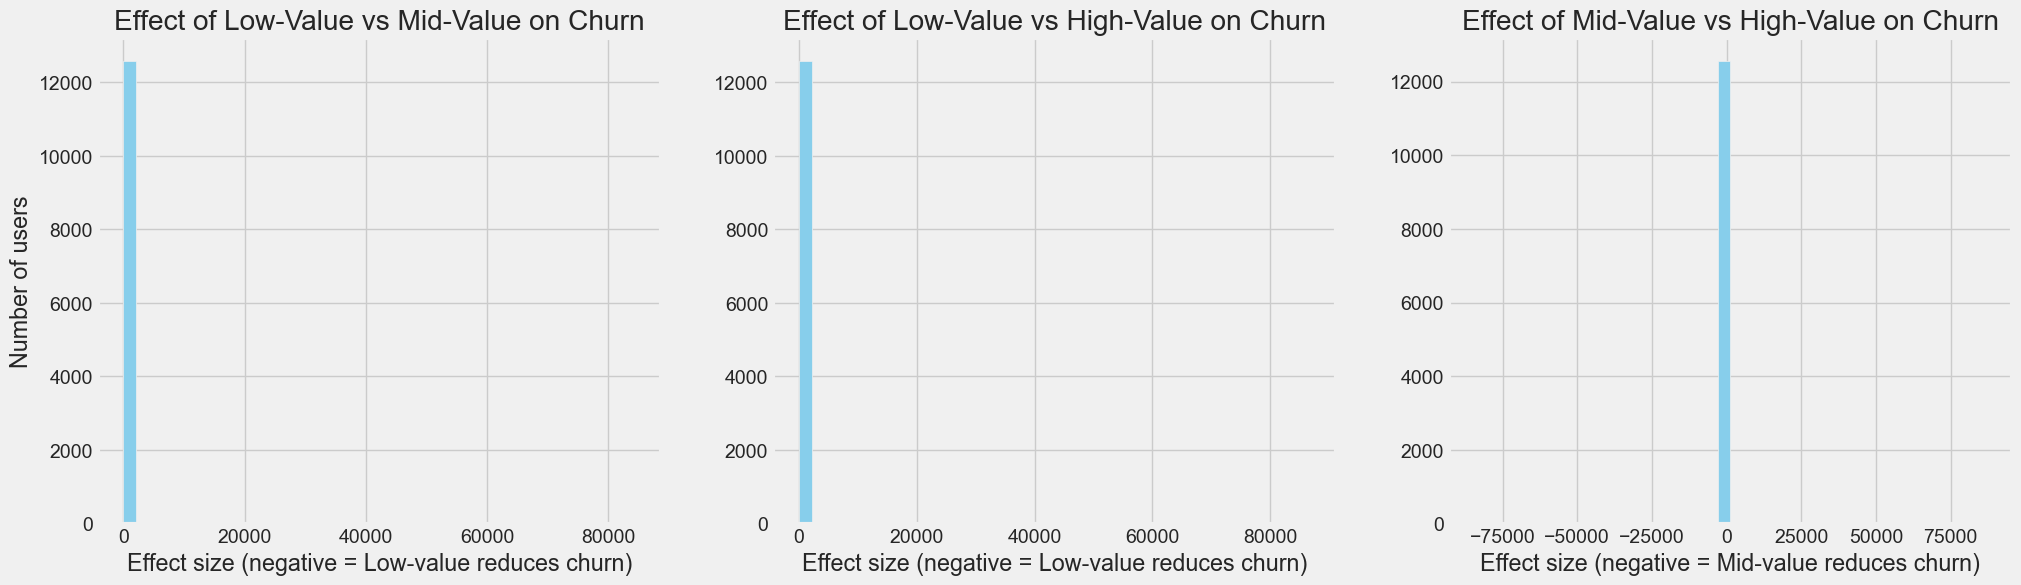

In [47]:
top_positive = df.sort_values('estimated_treatment_effect', ascending=False).head(10)
print(top_positive[['Capstone_id', 'estimated_treatment_effect', 'churned']])

plt.figure(figsize=(22,6))
plt.subplot(1,3,1)
plt.hist(df['low_vs_mid_effect'], bins=40, color='skyblue')
plt.title("Effect of Low-Value vs Mid-Value on Churn")
plt.xlabel("Effect size (negative = Low-value reduces churn)")
plt.ylabel("Number of users")

plt.subplot(1,3,2)
plt.hist(df['low_vs_high_effect'], bins=40, color='skyblue')
plt.title("Effect of Low-Value vs High-Value on Churn")
plt.xlabel("Effect size (negative = Low-value reduces churn)")
plt.ylabel("")

plt.subplot(1,3,3)
plt.hist(df['mid_vs_high_effect'], bins=40, color='skyblue')
plt.title("Effect of Mid-Value vs High-Value on Churn")
plt.xlabel("Effect size (negative = Mid-value reduces churn)")
plt.ylabel("")
plt.show()

In [48]:
from scipy.stats import skew

print("Skew of Low vs Mid:", skew(df['low_vs_mid_effect']))
print("Skew of Low vs High:", skew(df['low_vs_high_effect'])) # pos->right tail, high-value reduces churn
print("Skew of Mid vs High:", skew(df['mid_vs_high_effect']))

Skew of Low vs Mid: 65.86994409484186
Skew of Low vs High: 71.99056348127216
Skew of Mid vs High: 1.4070478146356855


**Conclusion:** Although from the graph, the distributions are right skewed, but most of the datapoints centered around zero, showing little significance across HML on churn.

### DoWhy
* Treatment (T): pick one segment comparison first
* Outcome (Y): churned
* Common Causes (X): other variables like Age, Income, monetary_1, etc.
#### Low vs non-low

In [50]:
import pandas as pd

# Binary treatment:
df['segment_1'] = (df['segment'] == 1).astype(int)
df['segment_2'] = (df['segment'] == 2).astype(int)
df['segment_3'] = (df['segment'] == 3).astype(int)
T = 'segment_1'
Y = 'churned'

# Choose features as common causes (avoid leakage)
common_causes = ['Recency_subs', 'Frequency_subs', 'Revenue_subs', 'multi_sub'
              'RECENCY_view', 'FREQUENCY_view', 'TENURE_view', 
              'TOTAL_WATCH_view_1m', 'TOTAL_WATCH_view_3m', 'TOTAL_WATCH_view_6m', 'PCT_DIFF_WATCH_1_2_view', 'PCT_DIFF_WATCH_2_3_view',  
              'RECENCY_online', 'TENURE_online', 
              'FREQUENCY_online_1m', 'FREQUENCY_online_3m', 'FREQUENCY_online_6m', 'PCT_DIFF_1_2_online', 'PCT_DIFF_2_3_online',
              'Age', 'Income', 'Gender'
              ]
print(len(common_causes))

21


```bash
/bin/bash -c "$(curl -fsSL https://raw.githubusercontent.com/Homebrew/install/HEAD/install.sh)"
brew install graphviz
which dot
dot -V
```

1 variables are assumed unobserved because they are not in the dataset. Configure the logging level to `logging.WARNING` or higher for additional details.


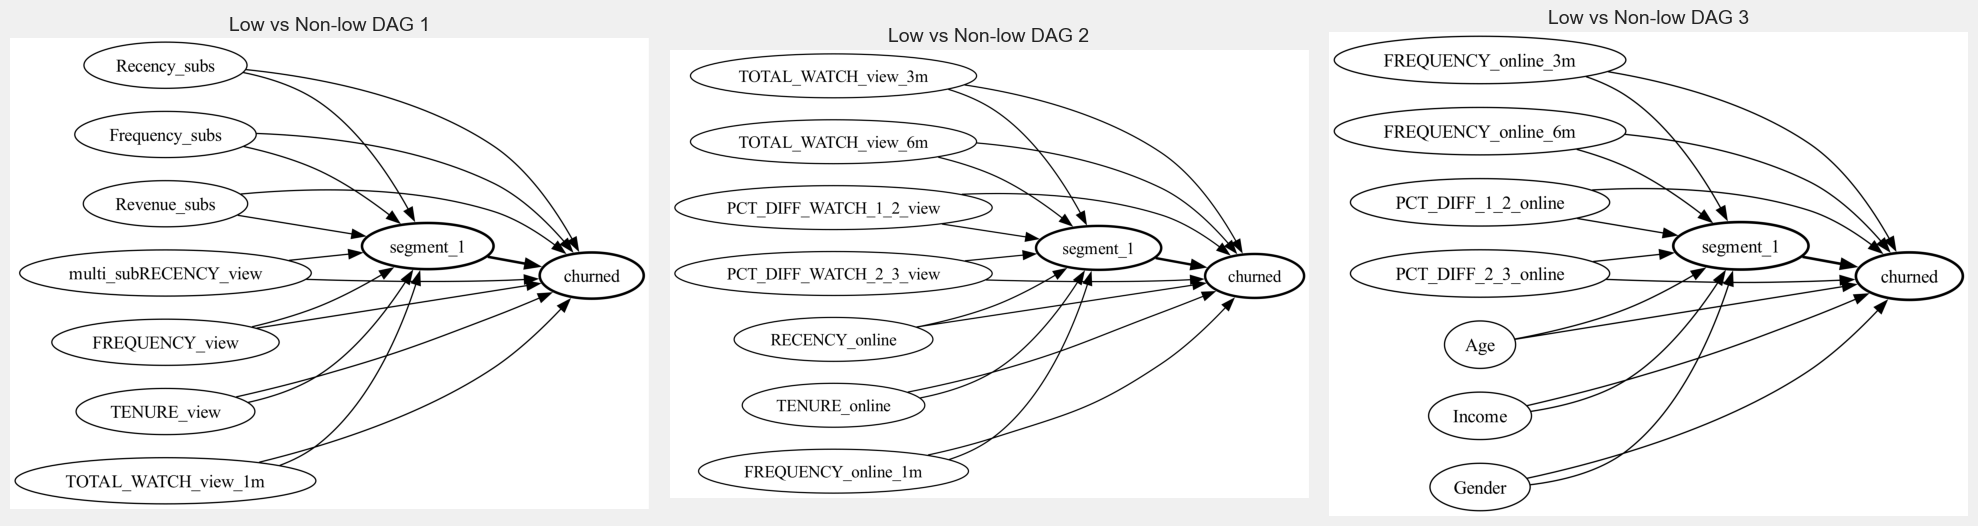

In [80]:
import dowhy
from dowhy import CausalModel
from IPython.display import Image, display
from graphviz import Source
from PIL import Image as PILImage
import networkx as nx
from networkx.drawing.nx_pydot import to_pydot
import os

sets_of_causes = [
    common_causes[0:7],
    common_causes[7:14],
    common_causes[14:21]
]

png_files = []

for i, causes in enumerate(sets_of_causes):
    model = CausalModel(
        data=df,
        treatment='segment_1',
        outcome='churned',
        common_causes=causes
    )
    
    # Get the raw DOT string
    G = model._graph._graph  # networkx.DiGraph
    pydot_graph = to_pydot(G)
    
    # Set layout attributes directly on the DOT graph
    pydot_graph.set_graph_defaults(rankdir='LR', dpi='300', size='10,5!')
    pydot_graph.set_node_defaults(fontsize='14')
    pydot_graph.set_edge_defaults(arrowsize='0.7')

    # Convert to DOT string
    dot_string = pydot_graph.to_string()

    # Then create the Source
    from graphviz import Source
    graph = Source(dot_string)
    
    filename = f"causal_dag_full/model_low_{i+1}"
    output_path = graph.render(filename=filename, format="png", cleanup=True)
    png_files.append(output_path)

# Show DAGs side-by-side
fig, axes = plt.subplots(1, len(png_files), figsize=(20, 6))
for i, path in enumerate(png_files):
    img = PILImage.open(path)
    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].set_title(f"Low vs Non-low DAG {i+1}", fontsize=14)

plt.tight_layout()
plt.show()

In [69]:
identified_model = model.identify_effect()
estimate = model.estimate_effect(
    identified_model, 
    method_name="backdoor.propensity_score_matching"
    )
print("Causal effect of being in Segment 1 vs not:", estimate.value)

Causal effect of being in Segment 1 vs not: 0.3930131004366812


**Note:**
If estimate.value is negative, being in Segment 1 reduces churn

**Conclusion:**
Non-low segement reduces churn.

In [70]:
refutation = model.refute_estimate(
    identified_model,
    estimate,
    method_name="placebo_treatment_refuter"
)
print(refutation)

Refute: Use a Placebo Treatment
Estimated effect:0.3930131004366812
New effect:-0.0016784438269154428
p value:0.94



**Note:**
Refute using a Placebo Treatment = “Replace the real treatment (segment_1) with a fake/randomized treatment and re-estimate the effect.”
* If the model is picking up real causal signals, the placebo should give a near-zero effect.

**Conclusion:**
* Original effect: 0.39 - Being in low-value segment increases churn by ~39% points
* Placebo effect: ~0 - placebo has no real effect, as expected
* p-value: 0.94 - There is a 94% chance the original effect could have occurred even with no real treatment effect.

The model did not pass the placebo refutation test that our original estimate might be due to random noise or residual confounding and causal effect not robust under this test. Same results from the following two cases.

#### Mid vs non-mid

1 variables are assumed unobserved because they are not in the dataset. Configure the logging level to `logging.WARNING` or higher for additional details.


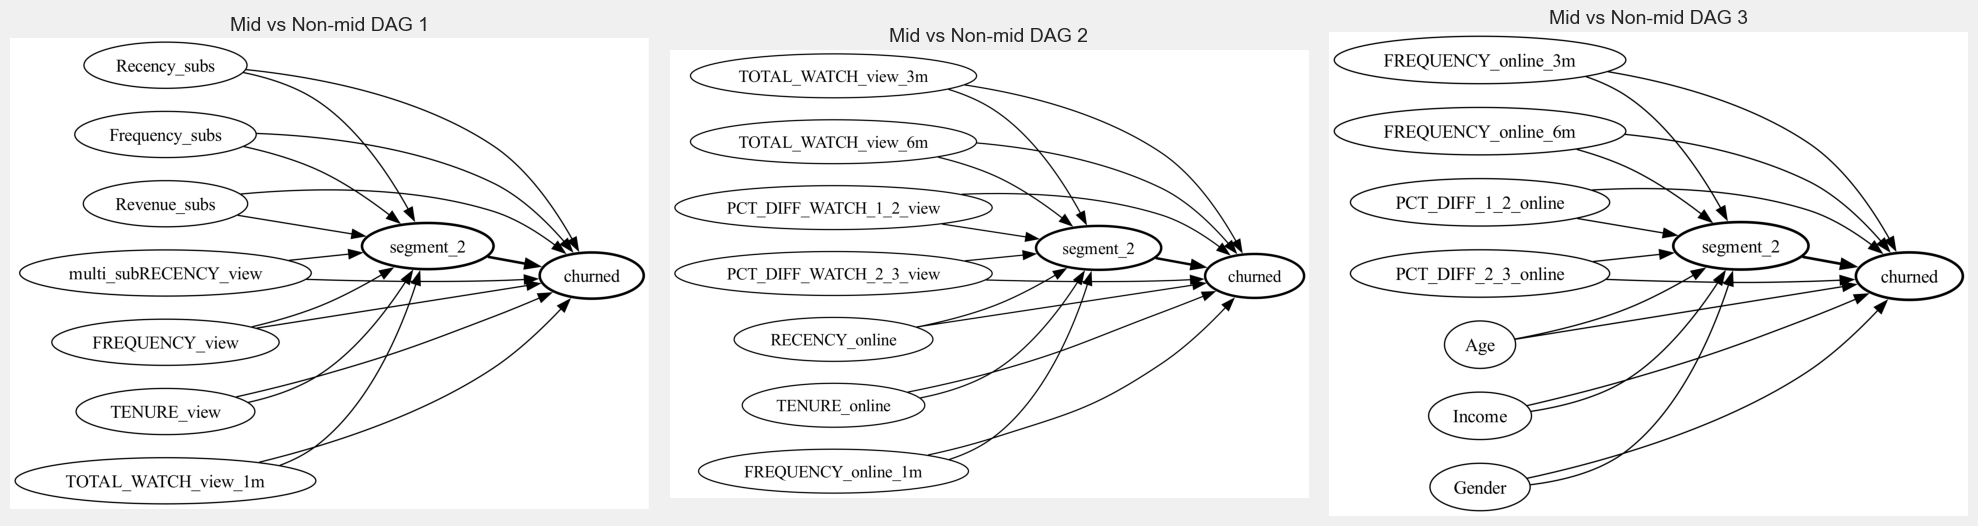

In [79]:
T = 'segment_2'

import dowhy
from dowhy import CausalModel
from IPython.display import Image, display
from graphviz import Source
from PIL import Image as PILImage
import networkx as nx
from networkx.drawing.nx_pydot import to_pydot
import os

sets_of_causes = [
    common_causes[0:7],
    common_causes[7:14],
    common_causes[14:21]
]

png_files = []

for i, causes in enumerate(sets_of_causes):
    model = CausalModel(
        data=df,
        treatment='segment_2',
        outcome='churned',
        common_causes=causes
    )
    
    # Get the raw DOT string
    G = model._graph._graph  # networkx.DiGraph
    pydot_graph = to_pydot(G)
    
    # Set layout attributes directly on the DOT graph
    pydot_graph.set_graph_defaults(rankdir='LR', dpi='300', size='10,5!')
    pydot_graph.set_node_defaults(fontsize='14')
    pydot_graph.set_edge_defaults(arrowsize='0.7')

    # Convert to DOT string
    dot_string = pydot_graph.to_string()

    # Then create the Source
    from graphviz import Source
    graph = Source(dot_string)
    
    filename = f"causal_dag_full/model_mid_{i+1}"
    output_path = graph.render(filename=filename, format="png", cleanup=True)
    png_files.append(output_path)

# Show DAGs side-by-side
fig, axes = plt.subplots(1, len(png_files), figsize=(20, 6))
for i, path in enumerate(png_files):
    img = PILImage.open(path)
    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].set_title(f"Mid vs Non-mid DAG {i+1}", fontsize=14)

plt.tight_layout()
plt.show()

In [73]:
identified_model = model.identify_effect()
estimate = model.estimate_effect(
    identified_model, 
    method_name="backdoor.propensity_score_matching"
    )
print("Causal effect of being in Segment 2 vs not:", estimate.value)

Causal effect of being in Segment 2 vs not: -0.23858674077014688


In [74]:
refutation = model.refute_estimate(
    identified_model,
    estimate,
    method_name="placebo_treatment_refuter"
)
print(refutation)

Refute: Use a Placebo Treatment
Estimated effect:-0.23858674077014688
New effect:0.0006034140531957124
p value:0.9199999999999999



#### High vs non-high

1 variables are assumed unobserved because they are not in the dataset. Configure the logging level to `logging.WARNING` or higher for additional details.


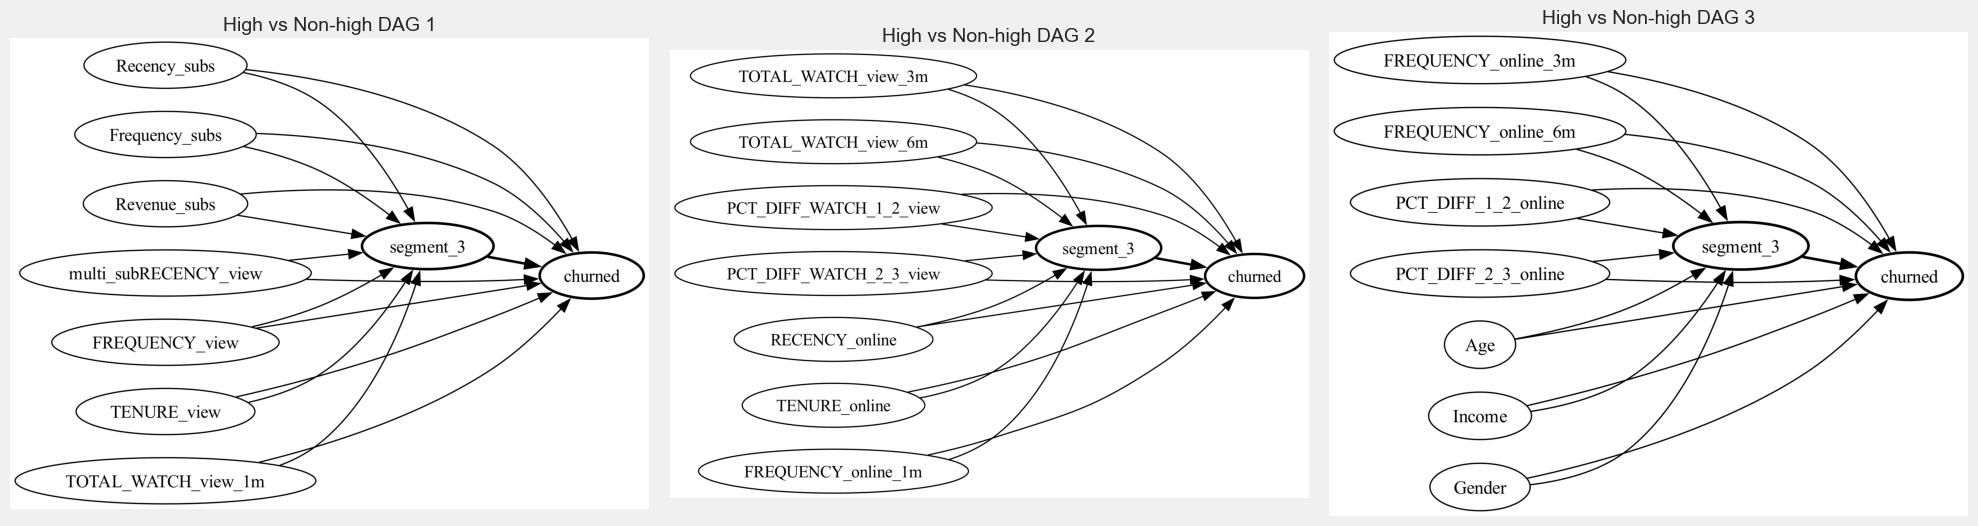

In [81]:
T = 'segment_3'

import dowhy
from dowhy import CausalModel
from IPython.display import Image, display
from graphviz import Source
from PIL import Image as PILImage
import networkx as nx
from networkx.drawing.nx_pydot import to_pydot
import os

sets_of_causes = [
    common_causes[0:7],
    common_causes[7:14],
    common_causes[14:21]
]

png_files = []

for i, causes in enumerate(sets_of_causes):
    model = CausalModel(
        data=df,
        treatment='segment_3',
        outcome='churned',
        common_causes=causes
    )
    
    # Get the raw DOT string
    G = model._graph._graph  # networkx.DiGraph
    pydot_graph = to_pydot(G)
    
    # Set layout attributes directly on the DOT graph
    pydot_graph.set_graph_defaults(rankdir='LR', dpi='300', size='10,5!')
    pydot_graph.set_node_defaults(fontsize='14')
    pydot_graph.set_edge_defaults(arrowsize='0.7')

    # Convert to DOT string
    dot_string = pydot_graph.to_string()

    # Then create the Source
    from graphviz import Source
    graph = Source(dot_string)
    
    filename = f"causal_dag_full/model_high_{i+1}"
    output_path = graph.render(filename=filename, format="png", cleanup=True)
    png_files.append(output_path)

# Show DAGs side-by-side
fig, axes = plt.subplots(1, len(png_files), figsize=(20, 6))
for i, path in enumerate(png_files):
    img = PILImage.open(path)
    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].set_title(f"High vs Non-high DAG {i+1}", fontsize=14)

plt.tight_layout()
plt.show()

In [77]:
identified_model = model.identify_effect()
estimate = model.estimate_effect(
    identified_model, 
    method_name="backdoor.propensity_score_matching"
    )
print("Causal effect of being in Segment 3 vs not:", estimate.value)

Causal effect of being in Segment 3 vs not: -0.21024215958713777


In [78]:
refutation = model.refute_estimate(
    identified_model,
    estimate,
    method_name="placebo_treatment_refuter"
)
print(refutation)

Refute: Use a Placebo Treatment
Estimated effect:-0.21024215958713777
New effect:0.0016887653830885273
p value:0.8500000000000001

